In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings;
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import tushare as ts

### 前导知识学习

In [3]:
data = ts.get_k_data('600030',start='2010-01-01',end='2017-06-30')

In [4]:
data.head()

,date,open,close,high,low,volume,code
0,2010-01-04,17.016,16.639,17.176,16.612,1106207.58,600030
1,2010-01-05,16.777,17.452,17.601,16.383,2093915.41,600030
2,2010-01-06,17.548,17.250,17.628,17.229,1437889.30,600030
3,2010-01-07,17.239,16.830,17.484,16.697,1235592.34,600030
4,2010-01-08,16.718,17.154,17.208,16.644,1040929.92,600030


In [5]:
# 将日期设置为索引
data.set_index('date',inplace=True)

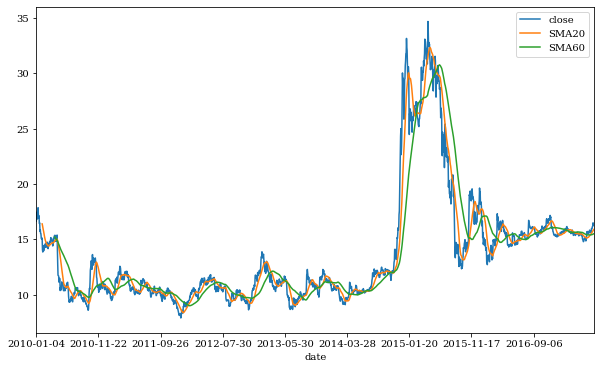

In [7]:
data['SMA20'] = data['close'].rolling(20).mean()

data['SMA60'] = data['close'].rolling(60).mean()

# 画图
data[['close','SMA20','SMA60']].plot(figsize=(10,6))

In [12]:
# 连续数据计算收益
data['returns'] = np.log(data['close'] / data['close'].shift(1))  # Numpy 向量化操作避免循环

In [13]:
# 离散数据计算收益
data['returns_dis'] = data['close'] / data['close'].shift(1) - 1

In [14]:
# 离散数据计算收益
data['returns_dis2'] = data['close'].pct_change()

In [17]:
data.head()

,open,close,high,low,volume,code,SMA1,SMA2,SMA20,SMA60,returns,returns_dis,returns_dis2
date,,,,,,,,,,,,,
2010-01-04,17.016,16.639,17.176,16.612,1106207.58,600030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,16.777,17.452,17.601,16.383,2093915.41,600030,NaN,NaN,NaN,NaN,0.047705,0.048861,0.048861
2010-01-06,17.548,17.250,17.628,17.229,1437889.30,600030,NaN,NaN,NaN,NaN,-0.011642,-0.011575,-0.011575
2010-01-07,17.239,16.830,17.484,16.697,1235592.34,600030,NaN,NaN,NaN,NaN,-0.024649,-0.024348,-0.024348
2010-01-08,16.718,17.154,17.208,16.644,1040929.92,600030,NaN,NaN,NaN,NaN,0.019068,0.019251,0.019251


In [18]:
# 量化规则
data['position'] = np.where(data['SMA20'] > data['SMA60'],1,-1)

In [19]:
data.head()

,open,close,high,low,volume,code,SMA1,SMA2,SMA20,SMA60,returns,returns_dis,returns_dis2,position
date,,,,,,,,,,,,,,
2010-01-04,17.016,16.639,17.176,16.612,1106207.58,600030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2010-01-05,16.777,17.452,17.601,16.383,2093915.41,600030,NaN,NaN,NaN,NaN,0.047705,0.048861,0.048861,-1
2010-01-06,17.548,17.250,17.628,17.229,1437889.30,600030,NaN,NaN,NaN,NaN,-0.011642,-0.011575,-0.011575,-1
2010-01-07,17.239,16.830,17.484,16.697,1235592.34,600030,NaN,NaN,NaN,NaN,-0.024649,-0.024348,-0.024348,-1
2010-01-08,16.718,17.154,17.208,16.644,1040929.92,600030,NaN,NaN,NaN,NaN,0.019068,0.019251,0.019251,-1


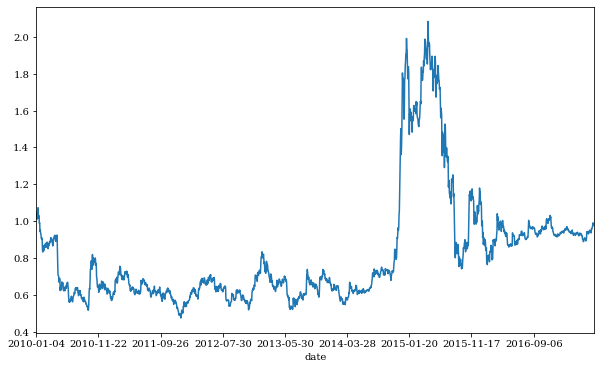

In [20]:
# 计算累计收益
data['returns'].cumsum().apply(np.exp).plot(figsize=(10,6))

## SMA 策略

In [21]:
import numpy as np
import pandas as pd
import tushare as ts

In [22]:
# 获取数据
data = ts.get_k_data('hs300',start='2010-01-01',end='2017-06-30')

In [23]:
data = pd.DataFrame(data)

In [24]:
data.head()

,date,open,close,high,low,volume,code
0,2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300
1,2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300
2,2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300
3,2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300
4,2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300


In [25]:
# 给“close”重命名
data.rename(columns={'close':'price'},inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1818
Data columns (total 7 columns):
date      1819 non-null object
open      1819 non-null float64
price     1819 non-null float64
high      1819 non-null float64
low       1819 non-null float64
volume    1819 non-null float64
code      1819 non-null object
dtypes: float64(5), object(2)
memory usage: 113.7+ KB


In [27]:
data.head()  # close 跟换成 price

,date,open,price,high,low,volume,code
0,2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300
1,2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300
2,2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300
3,2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300
4,2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300


In [28]:
# 设置 date 为日期索引
data.set_index('date',inplace=True)

In [29]:
data.head()

,open,price,high,low,volume,code
date,,,,,,
2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300
2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300
2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300
2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300
2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300


In [33]:
data['SMA10'] = data['price'].rolling(10).mean()

data['SMA60'] = data['price'].rolling(60).mean()

data.head(30)

,open,price,high,low,volume,code,SMA10,SAM60,SMA60
date,,,,,,,,,
2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300,NaN,NaN,NaN
2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300,NaN,NaN,NaN
2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300,NaN,NaN,NaN
2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300,NaN,NaN,NaN
2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300,NaN,NaN,NaN
2010-01-11,3593.106,3482.052,3594.53,3465.32,89980172.0,hs300,NaN,NaN,NaN
2010-01-12,3477.842,3534.916,3535.41,3437.66,93743278.0,hs300,NaN,NaN,NaN
2010-01-13,3448.291,3421.144,3490.11,3415.69,112457901.0,hs300,NaN,NaN,NaN
2010-01-14,3433.472,3469.051,3470.32,3411.81,83353252.0,hs300,NaN,NaN,NaN


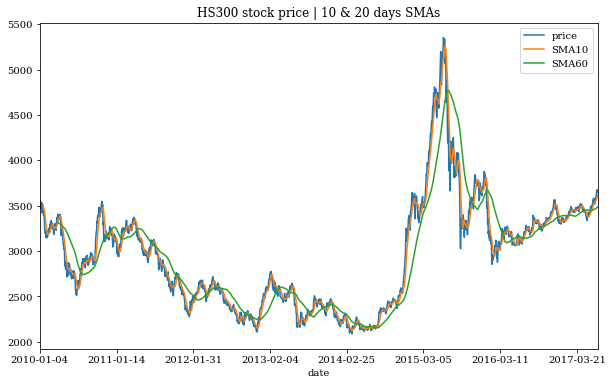

In [34]:
# 可视化
data[['price','SMA10','SMA60']].plot(title='HS300 stock price | 10 & 20 days SMAs',figsize=(10,6))

In [35]:
# 策略开发
data['position'] = np.where(data['SMA10'] > data['SMA60'],1,-1)

,open,price,high,low,volume,code,SMA10,SAM60,SMA60,position
date,,,,,,,,,,
2010-04-02,3400.139,3407.346,3412.20,3391.81,69073452.0,hs300,3322.9136,3313.538117,3313.538117,1
2010-04-06,3422.849,3405.145,3436.29,3386.89,65191710.0,hs300,3333.1653,3311.370050,3311.370050,1
2010-04-07,3403.088,3386.949,3404.58,3369.02,54011228.0,hs300,3344.3029,3308.418567,3308.418567,1
2010-04-08,3381.306,3346.744,3381.31,3336.16,62185322.0,hs300,3351.3104,3305.168850,3305.168850,1
2010-04-09,3348.773,3379.170,3379.40,3342.47,51280567.0,hs300,3366.3146,3303.630750,3303.630750,1


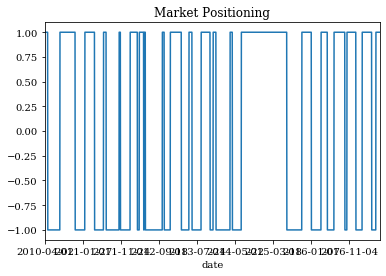

In [36]:
# 将空值删除
data.dropna(inplace=True)

data['position'].plot(ylim=[-1.1,1.1],title='Market Positioning')

data.head()

In [38]:
# 计算策略收益
data['returns'] = np.log(data['price']/data['price'].shift(1))

In [39]:
data.head()

,open,price,high,low,volume,code,SMA10,SAM60,SMA60,position,returns
date,,,,,,,,,,,
2010-04-02,3400.139,3407.346,3412.20,3391.81,69073452.0,hs300,3322.9136,3313.538117,3313.538117,1,NaN
2010-04-06,3422.849,3405.145,3436.29,3386.89,65191710.0,hs300,3333.1653,3311.370050,3311.370050,1,-0.000646
2010-04-07,3403.088,3386.949,3404.58,3369.02,54011228.0,hs300,3344.3029,3308.418567,3308.418567,1,-0.005358
2010-04-08,3381.306,3346.744,3381.31,3336.16,62185322.0,hs300,3351.3104,3305.168850,3305.168850,1,-0.011942
2010-04-09,3348.773,3379.170,3379.40,3342.47,51280567.0,hs300,3366.3146,3303.630750,3303.630750,1,0.009642


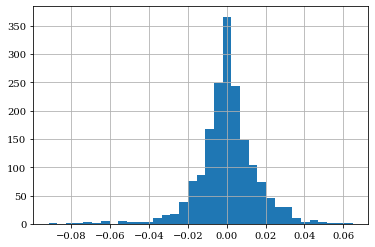

In [44]:
data['returns'].hist(bins=35)

In [41]:
data['returns_dis'] = data['price']/data['price'].shift(1) - 1

In [42]:
data['returns_dis2'] = data['price'].pct_change()

In [43]:
# 计算策略收益
data['strategy'] = data['position'].shift(1) * data['returns']

In [45]:
data[['returns','strategy']].sum()

returns     0.073386
strategy    0.727122
dtype: float64

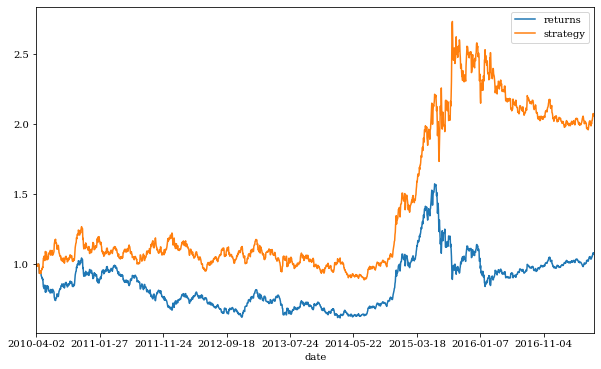

In [46]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

### 策略收益风险评估

In [47]:
# 计算年化收益率
data[['returns','strategy']].mean() * 252

returns     0.010513
strategy    0.104170
dtype: float64

In [48]:
# 计算年化风险
data[['returns','strategy']].std() * 252 ** 0.5

returns     0.245468
strategy    0.245382
dtype: float64

In [50]:
# 累计收益
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [51]:
# 计算累计求和数列中的最大值
data['cummax'] = data['cumret'].cummax()

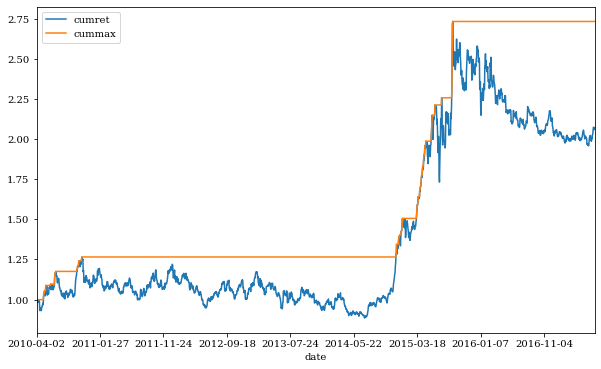

In [53]:
data[['cumret','cummax']].plot(figsize=(10,6))

In [54]:
# 计算回测
drawdown = (data['cummax'] - data['cumret'])

In [55]:
# 计算原理： 最大回撤
drawdown.max()

0.7744165301748813

In [56]:
# 当前累计收益率 = 累计最大收益率
temp = drawdown[drawdown == 0]

In [64]:
periods = pd.to_datetime(temp.index[1:]) - pd.to_datetime(temp.index[:-1])

In [65]:
periods

TimedeltaIndex([  '30 days',    '1 days',    '4 days',    '6 days',
                  '21 days',   '22 days',    '1 days',    '1 days',
                   '4 days',  '102 days',    '4 days',    '1 days',
                   '5 days',   '11 days',    '3 days', '1487 days',
                   '1 days',    '3 days',    '8 days',    '1 days',
                   '2 days',    '3 days',    '4 days',    '3 days',
                   '1 days',    '1 days',    '5 days',    '2 days',
                  '68 days',    '1 days',    '1 days',    '2 days',
                   '3 days',    '1 days',    '6 days',    '2 days',
                   '1 days',    '1 days',    '4 days',    '1 days',
                   '2 days',    '3 days',    '1 days',    '2 days',
                   '1 days',    '4 days',    '1 days',    '1 days',
                   '4 days',   '24 days',    '1 days',    '3 days',
                   '1 days',   '10 days',    '3 days',   '30 days',
                  '44 days',    '3 days',    '1 

In [66]:
periods.max()

Timedelta('1487 days 00:00:00')

### 策略优化

In [67]:
hs300 = ts.get_k_data('hs300','2010-01-01','2012-06-30')[['date','close']]

In [68]:
hs300 = pd.DataFrame(hs300)

In [70]:
hs300.rename(columns={'close':'price'},inplace=True)

In [71]:
hs300.set_index('date',inplace=True)

In [72]:
hs300.head()

,price
date,
2010-01-04,3535.229
2010-01-05,3564.038
2010-01-06,3541.727
2010-01-07,3471.456
2010-01-08,3480.130


In [73]:
hs300['SMA10'] = hs300['price'].rolling(10).mean()

hs300['SMA60'] = hs300['price'].rolling(60).mean()

In [74]:
hs300[['price','SMA10','SMA60']].tail()

,price,SMA10,SMA60
date,,,
2012-06-25,2456.52,2546.870,2584.591833
2012-06-26,2454.92,2536.536,2582.916500
2012-06-27,2447.20,2527.238,2581.250833
2012-06-28,2425.73,2511.747,2580.431333
2012-06-29,2461.61,2501.866,2580.739500


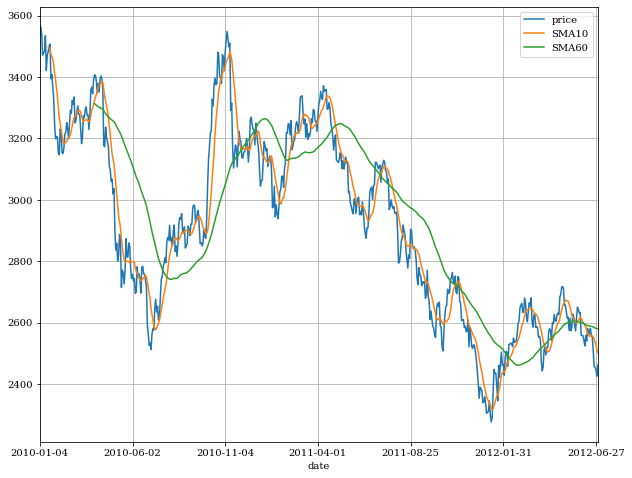

In [75]:
hs300[['price','SMA10','SMA60']].plot(grid=True,figsize=(10,8))

In [76]:
hs300['10-60'] = hs300['SMA10'] - hs300['SMA60']

SD = 50

hs300['regime'] = np.where(hs300['10-60']>SD,1,0)
hs300['regime'] = np.where(hs300['10-60']<-SD,-1,hs300['regime'])
# 对结果进行统计
hs300['regime'].value_counts()

-1    235
 0    203
 1    165
Name: regime, dtype: int64

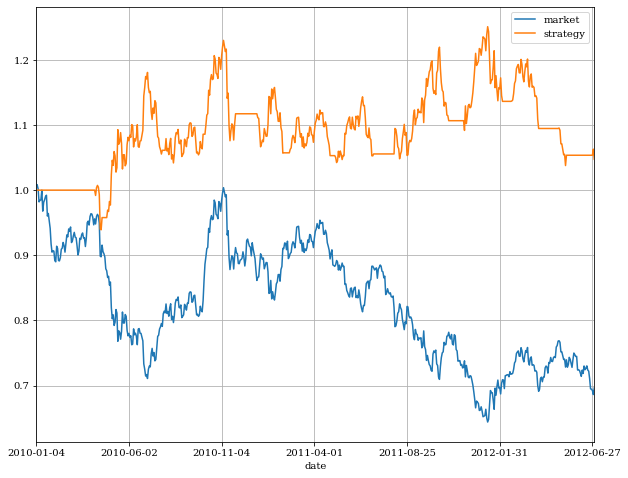

In [77]:
hs300['market'] = np.log(hs300['price']/hs300['price'].shift(1))

hs300['strategy'] = hs300['regime'].shift(1) * hs300['market']

hs300[['market','strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(10,8))